In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [25]:
from google.colab import files
uploaded = files.upload()

Saving census-income .csv to census-income .csv


**linear-reg**

In [3]:
house = pd.read_csv('/content/housing.csv')
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [5]:
house.duplicated().sum()

np.int64(0)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# drop un-needed columns
house.drop(['id','date'], axis=1, inplace=True)

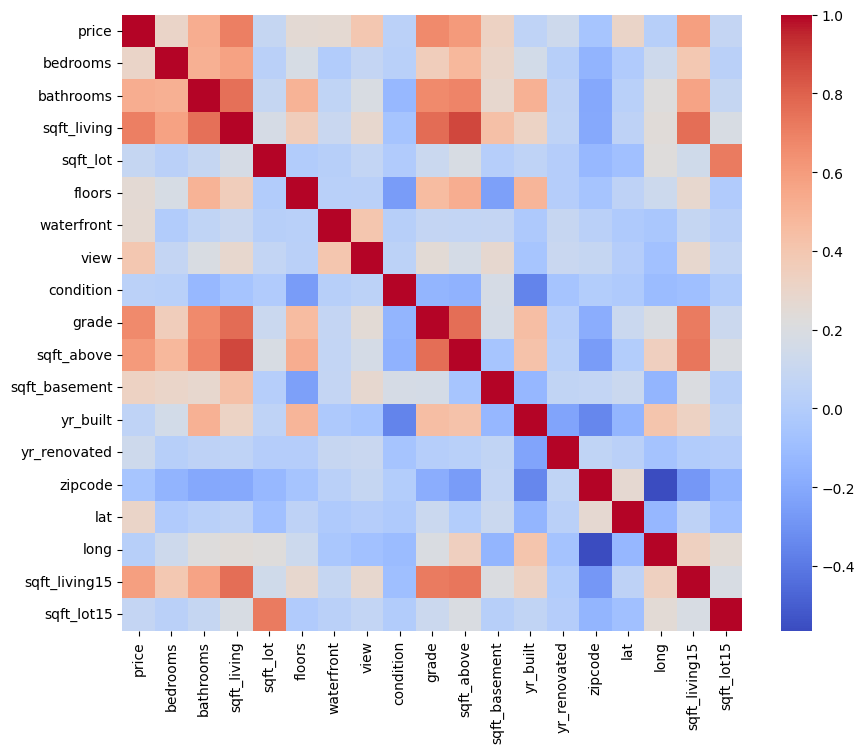

In [9]:
# Heat-map
plt.figure(figsize=(10,8))
sns.heatmap(house.corr(), cmap='coolwarm')
plt.show()

In [11]:
house.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


<Axes: xlabel='sqft_living', ylabel='price'>

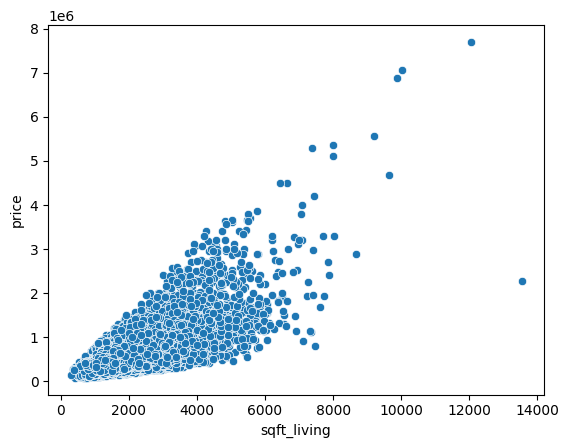

In [12]:
sns.scatterplot(x=house['sqft_living'], y=house['price'])

In [13]:
house.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
# features/target
x = house.drop('price',axis=1)
y = house['price']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
linmod = LinearRegression()
linmod.fit(x_train, y_train)

LinearRegression()

In [17]:
print('Coeffcients:-',linmod.coef_)

Coeffcients:- [-3.43354189e+04  4.45645358e+04  1.09015816e+02  8.88473505e-02
  7.00312462e+03  5.62413071e+05  5.36411067e+04  2.45267105e+04
  9.45678906e+04  7.00227412e+01  3.89930749e+01 -2.68076897e+03
  2.04156320e+01 -5.52253009e+02  5.95968123e+05 -1.94585720e+05
  2.12143281e+01 -3.25831855e-01]


In [18]:
print('Intercept:-',linmod.intercept_)

Intercept:- 6643871.386180959


In [19]:
y_pred = linmod.predict(x_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
r2_score(y_test, y_pred)
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 45173046173.716156
Root Mean Squared Error: 212539.51673445612
R-squared Score: 0.7011904426369304


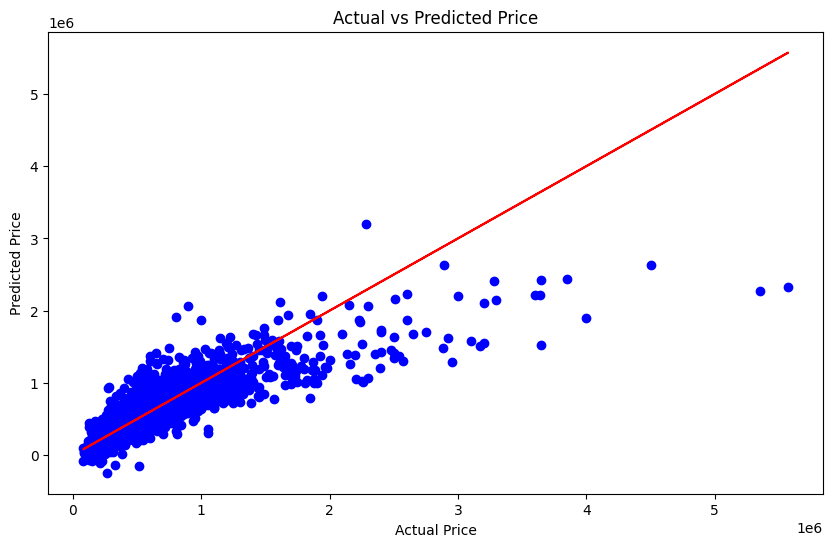

In [21]:
#Plot-graph
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

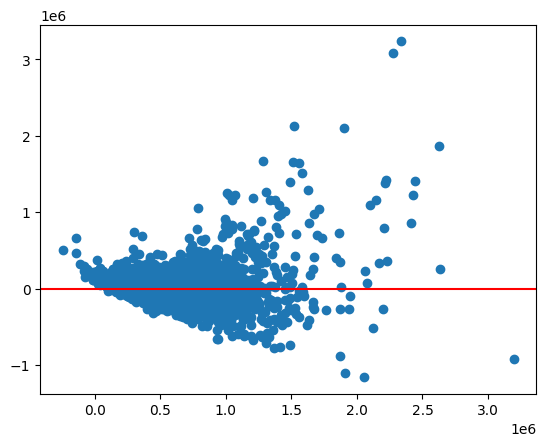

In [23]:
pred = linmod.predict(x_test)
residuals = y_test - pred

plt.scatter(pred, residuals)
plt.axhline(0, color='red')
plt.show()

**logistic-reg**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
income = pd.read_csv('/content/census-income .csv')
income.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
income.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [29]:
income.duplicated().sum()

np.int64(24)

In [30]:
income.drop_duplicates(inplace=True)

In [31]:
income['age'].nunique()

73

In [32]:
income['sex'].value_counts()

,count
sex,
Male,21775
Female,10762


In [33]:
col=income.columns
print(col)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')


In [34]:
col.value_counts()

,count
age,1
workclass,1
fnlwgt,1
education,1
education-num,1
marital-status,1
occupation,1
relationship,1
race,1
sex,1


In [35]:
print(income['workclass'].value_counts())
print(income['race'].value_counts())

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


In [36]:
le = LabelEncoder()

In [37]:
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'annual_income']:
    income[col] = le.fit_transform(income[col])


In [38]:
print("Encoded 'workclass' column value counts:")
display(income['workclass'].value_counts())
print("\nFirst 5 rows of the DataFrame with encoded columns:")
display(income.head())

Encoded 'workclass' column value counts:


,count
workclass,
4,22673
6,2540
2,2093
0,1836
7,1298
5,1116
1,960
8,14
3,7



First 5 rows of the DataFrame with encoded columns:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [39]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int64
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int64
 4   education-num   32537 non-null  int64
 5   marital-status  32537 non-null  int64
 6   occupation      32537 non-null  int64
 7   relationship    32537 non-null  int64
 8   race            32537 non-null  int64
 9   sex             32537 non-null  int64
 10  capital-gain    32537 non-null  int64
 11  capital-loss    32537 non-null  int64
 12  hours-per-week  32537 non-null  int64
 13  native-country  32537 non-null  int64
 14  annual_income   32537 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


In [40]:
income.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.868734,1.897808e+05,10.297507,10.081815,2.611427,6.572856,1.446538,3.665827,0.669238,1078.443741,87.368227,40.440329,36.721579,0.240926
std,13.637984,1.456445,1.055565e+05,3.870142,2.571633,1.506301,4.229521,1.607064,0.848847,0.470495,7387.957424,403.101833,12.346889,7.820732,0.427652
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369930e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


/tmp/ipython-input-2857241141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=income, x='annual_income', palette='viridis')


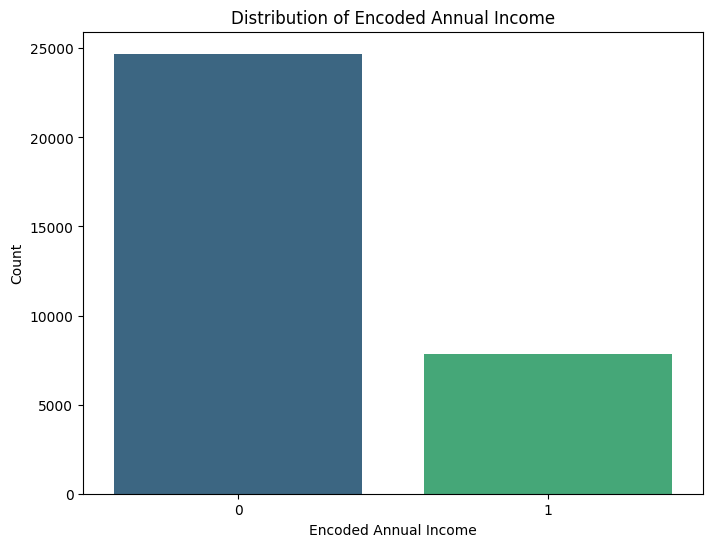

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=income, x='annual_income', palette='viridis')
plt.title('Distribution of Encoded Annual Income')
plt.xlabel('Encoded Annual Income')
plt.ylabel('Count')
plt.show()

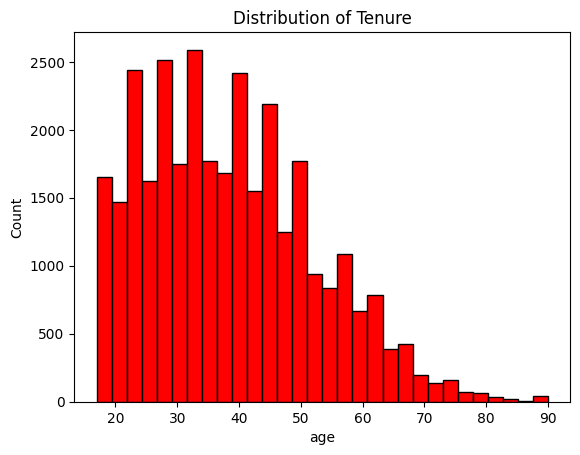

In [ ]:
plt.hist(income['age'],bins=30,color='red',edgecolor='black')
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

(array([3.1018e+04, 5.0000e+00, 6.0000e+00, 0.0000e+00, 1.5000e+01,
        2.0000e+00, 8.0000e+00, 9.0000e+00, 4.0000e+00, 3.6000e+01,
        1.6900e+02, 2.5600e+02, 2.7200e+02, 4.5700e+02, 5.0000e+01,
        7.1000e+01, 1.1300e+02, 2.3000e+01, 2.0000e+00, 1.0000e+01,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,  145.2,  290.4,  435.6,  580.8,  726. ,  871.2, 1016.4,
        1161.6, 1306.8, 1452. , 1597.2, 1742.4, 1887.6, 2032.8, 2178. ,
        2323.2, 2468.4, 2613.6, 2758.8, 2904. , 3049.2, 3194.4, 3339.6,
        3484.8, 3630. , 3775.2, 3920.4, 4065.6, 4210.8, 4356. ]),
 <BarContainer object of 30 artists>)

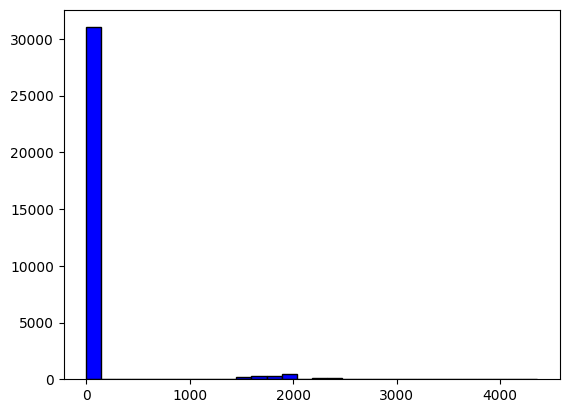

In [ ]:
plt.hist(income['capital-loss'],bins=30,color='blue',edgecolor='black')

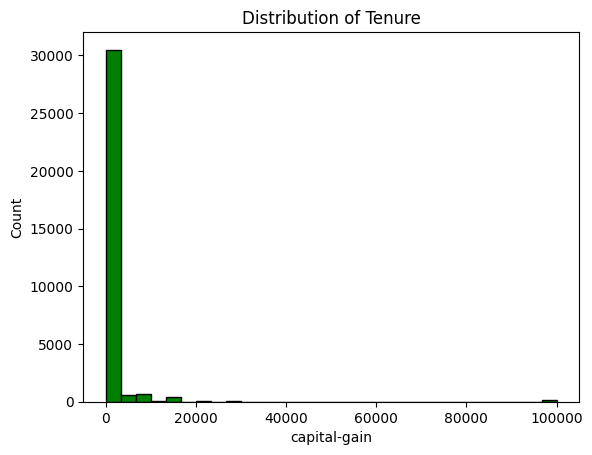

In [ ]:
plt.hist(income['capital-gain'],bins=30,color='green',edgecolor='black')
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
# freature selection
x = income.drop('annual_income', axis=1)
y = income['annual_income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [43]:
x_train.shape

(26029, 14)

In [44]:
y_train.shape

(26029,)

In [45]:
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [46]:
y_pred = model.predict(x_test)

In [47]:
accuracy_score(y_pred,y_test)*100

81.03872157344807

In [48]:
confusion_matrix(y_pred,y_test)

array([[4611,  940],
       [ 294,  663]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4905
           1       0.69      0.41      0.52      1603

    accuracy                           0.81      6508
   macro avg       0.76      0.68      0.70      6508
weighted avg       0.80      0.81      0.79      6508



<Axes: >

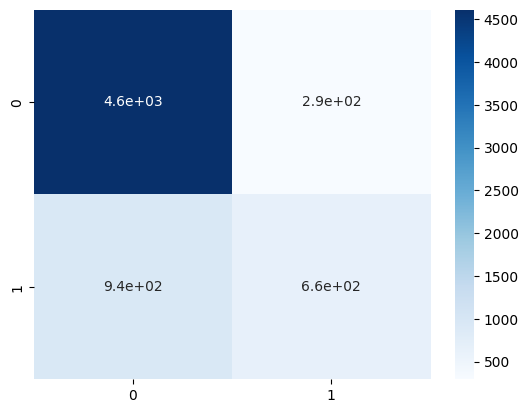

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")